In [29]:
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline

import imageio

from glob import glob
import numpy as np
from tqdm import tqdm

from PoisDenoiser.utils import show_images as show
from skimage.transform import resize

import torch as th

def RandomCrop4_both(gt, noisy, size):
    gt = gt.copy()
    noisy = noisy.copy()
    
    rand_y = np.random.randint(0, gt.shape[0]-size)
    rand_x = np.random.randint(0, gt.shape[1]-size)
    gt = gt[rand_y:rand_y+size, rand_x:rand_x+size]
    noisy = noisy[rand_y:rand_y+size, rand_x:rand_x+size]
    return gt, noisy

# Confocal -FISH

# Twophoton - MICE

In [18]:
experiments = ['confocal', 'twophoton']
orig_folders = ['Confocal_FISH', 'TwoPhoton_MICE']

new_folders = ['train', 'val']

new_dataset_path = './DATASETS/FMD/fmd/'
orig_dataset_path = './DATASETS/FMD/denoising/dataset/'

size = 128

# Generate VAL FULL

In [20]:
points = [19,20] # only one image

for exp, orig_folder in zip(experiments, orig_folders):
    
    save_path = new_dataset_path+exp+'/VAL_FULL/'
        
    path2gt = orig_dataset_path+orig_folder+'/gt/'
    path2noisy = orig_dataset_path+orig_folder+'/raw/'

    for point in points:
        path2gt_point = path2gt + str(point) + '/'
        path2noisy_point = path2noisy + str(point) + '/'

        # the only one gt per point
        path_gt = glob(path2gt_point+'*.png')[0]
        gt = imread(path_gt).astype(np.float32)
        gt[gt < 1] = 1
        gt /= 255      

        # there are 50 images per one point
        path_noisy = glob(path2noisy_point+'*.png')[0]

        noisy = imread(path_noisy).astype(np.float32)
        noisy[noisy < 1] = 1
        noisy /= 255

        gt = th.FloatTensor(gt)
        noisy = th.FloatTensor(noisy)

        gt.unsqueeze_(0)
        noisy.unsqueeze_(0) 

        th.save(gt, save_path+'gt/'+'{}.pth'.format(point))
        th.save(noisy, save_path+'noisy/'+'{}.pth'.format(point))  

In [3]:
# there are 20 different points of view for one experiment
# let's take 18 for train, 2 for validation
points_of_view_train = list(range(1, 18+1))
points_of_view_val = list(range(19, 20+1))

In [4]:
np.random.seed(1)

# let's sample 900 pairs per experiment (18 points)
# => 50 samples per point
num_samples_per_point_train = 50 

# Then, the number of validation images must be ~ 40 images => 
# 20 samples per point for val
num_samples_per_point_val = 20

TRAIN

In [13]:
for exp, orig_folder in zip(experiments, orig_folders):
    
    save_path = new_dataset_path+exp+'/train/'
    for point in points_of_view_train:
        
        path2gt = orig_dataset_path+orig_folder+'/gt/'
        path2noisy = orig_dataset_path+orig_folder+'/raw/'
        
        path2gt_point = path2gt + str(point) + '/'
        path2noisy_point = path2noisy + str(point) + '/'
        
        # the only one gt per point
        path_gt = glob(path2gt_point+'*.png')[0]
        gt = imread(path_gt).astype(np.float32)
        gt[gt < 1] = 1
        gt /= 255      
        
        # there are 50 images per one point
        paths_noisy = glob(path2noisy_point+'*.png')
        
        for ind in range(1, num_samples_per_point_train+1):
            rand = np.random.randint(0, len(paths_noisy))
            path_noisy = paths_noisy[rand]
 
            noisy = imread(path_noisy).astype(np.float32)
            noisy[noisy < 1] = 1
            noisy /= 255

            gt_sample, noisy_sample = RandomCrop4_both(gt, noisy, size)

            gt_sample = th.FloatTensor(gt_sample)
            noisy_sample = th.FloatTensor(noisy_sample)
            
            gt_sample.unsqueeze_(0)
            noisy_sample.unsqueeze_(0) 
            
            th.save(gt_sample, save_path+'gt/'+'{}_{}.pth'\
                .format(point, ind))
            th.save(noisy_sample, save_path+'noisy/'+'{}_{}.pth'\
                .format(point, ind))  


VAL

In [15]:
for exp, orig_folder in zip(experiments, orig_folders):
    
    save_path = new_dataset_path+exp+'/val/'
    for point in points_of_view_val:
        
        path2gt = orig_dataset_path+orig_folder+'/gt/'
        path2noisy = orig_dataset_path+orig_folder+'/raw/'
        
        path2gt_point = path2gt + str(point) + '/'
        path2noisy_point = path2noisy + str(point) + '/'
        
        # the only one gt per point
        path_gt = glob(path2gt_point+'*.png')[0]
        gt = imread(path_gt).astype(np.float32)
        gt[gt < 1] = 1
        gt /= 255      
        
        # there are 50 images per one point
        paths_noisy = glob(path2noisy_point+'*.png')
        
        for ind in range(1, num_samples_per_point_val+1):
            rand = np.random.randint(0, len(paths_noisy))
            path_noisy = paths_noisy[rand]
 
            noisy = imread(path_noisy).astype(np.float32)
            noisy[noisy < 1] = 1
            noisy /= 255

            gt_sample, noisy_sample = RandomCrop4_both(gt, noisy, size)

            gt_sample = th.FloatTensor(gt_sample)
            noisy_sample = th.FloatTensor(noisy_sample)
            
            gt_sample.unsqueeze_(0)
            noisy_sample.unsqueeze_(0) 
            
            th.save(gt_sample, save_path+'gt/'+'{}_{}.pth'\
                .format(point, ind))
            th.save(noisy_sample, save_path+'noisy/'+'{}_{}.pth'\
                .format(point, ind))  

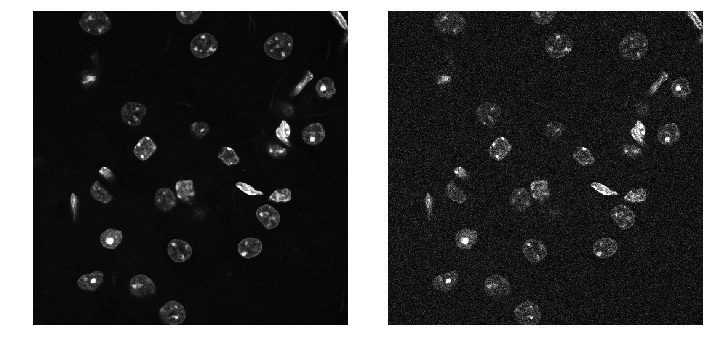

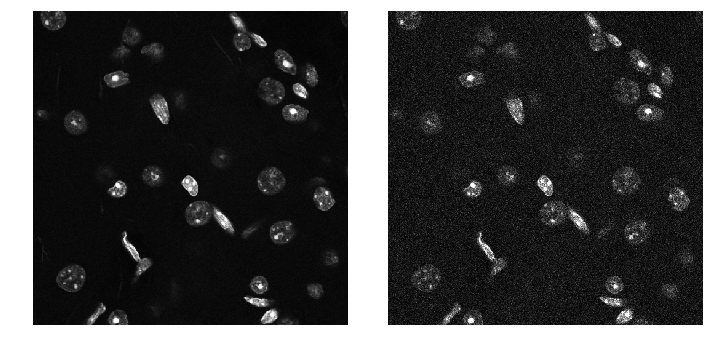

In [21]:
path2folder = './DATASETS/FMD/fmd/twophoton/VAL_FULL/'
names = sorted([name[len(path2folder)+3:-4] for name in glob(path2folder+'gt/*.pth')])
for name in names[:15]:
    clear = th.load(path2folder+'gt/'+name+'.pth')[0]
    noisy = th.load(path2folder+'noisy/'+name+'.pth')[0]
    clear.unsqueeze_(0)
    noisy.unsqueeze_(0)
    show([clear, noisy])
    

In [28]:
path2mix = './DATASETS/FMD/fmd/test_mix/'
for folder in ['gt', 'noisy']:
    path2save = path2mix+folder+'/'
    paths = glob(path2save+'*.png')
    for path in paths:
        name = path[len(path2save):-4]
        print(name)
        x = th.FloatTensor(imread(path))
        x[x<1] = 1
        x /= 255
        x = x.unsqueeze(0).unsqueeze(0)
        th.save(x, path2save+'{}.pth'.format(name))

Confocal_FISH_3
Confocal_FISH_4
Confocal_BPAE_B_2
WideField_BPAE_B_2
TwoPhoton_BPAE_B_4
TwoPhoton_BPAE_G_3
TwoPhoton_BPAE_B_3
Confocal_BPAE_B_1
WideField_BPAE_R_1
TwoPhoton_BPAE_G_1
WideField_BPAE_R_4
Confocal_BPAE_G_4
TwoPhoton_BPAE_R_3
TwoPhoton_BPAE_G_4
Confocal_FISH_1
WideField_BPAE_G_3
TwoPhoton_BPAE_R_1
TwoPhoton_MICE_1
Confocal_BPAE_R_1
Confocal_BPAE_B_3
WideField_BPAE_G_1
Confocal_BPAE_R_4
Confocal_BPAE_G_3
WideField_BPAE_R_2
Confocal_BPAE_G_2
WideField_BPAE_B_3
TwoPhoton_MICE_2
WideField_BPAE_G_2
Confocal_MICE_3
Confocal_FISH_2
WideField_BPAE_G_4
TwoPhoton_MICE_3
Confocal_BPAE_G_1
WideField_BPAE_R_3
TwoPhoton_BPAE_B_2
Confocal_BPAE_B_4
TwoPhoton_BPAE_B_1
WideField_BPAE_B_1
Confocal_BPAE_R_3
Confocal_MICE_4
TwoPhoton_BPAE_R_4
Confocal_MICE_1
WideField_BPAE_B_4
Confocal_MICE_2
Confocal_BPAE_R_2
TwoPhoton_MICE_4
TwoPhoton_BPAE_G_2
TwoPhoton_BPAE_R_2
Confocal_FISH_3
Confocal_FISH_4
Confocal_BPAE_B_2
WideField_BPAE_B_2
TwoPhoton_BPAE_B_4
TwoPhoton_BPAE_G_3
TwoPhoton_BPAE_B_3
Confoc